In [12]:
import pandas as pd

In [13]:
# Load the dataset

# Step 1: Load all three tuning CSVs
df_rf_xgb = pd.read_csv("tox21_model_tuning_results.csv")                # Random Forest & XGBoost
df_lr = pd.read_csv("logistic_regression_tuning_results.csv")           # Logistic Regression
df_svm = pd.read_csv("svm_tuning_results.csv")    

In [14]:
# Step 2: Standardize ROC-AUC column name across all

df_rf_xgb_clean = df_rf_xgb[['Target', 'Model', 'ROC_AUC']]

df_lr_clean = df_lr[['Target', 'Model', 'Best ROC-AUC']].rename(
    columns={'Best ROC-AUC': 'ROC_AUC'}
)

df_svm_clean = df_svm[['Target', 'Model', 'Best ROC-AUC']].rename(
    columns={'Best ROC-AUC': 'ROC_AUC'}
)

In [15]:
# Step 3: Combine all into a single DataFrame
combined_auc_df = pd.concat([df_rf_xgb_clean, df_lr_clean, df_svm_clean], ignore_index=True)

In [16]:
# Round for readability
combined_auc_df['ROC_AUC'] = combined_auc_df['ROC_AUC'].round(4)

# Step 4: Save the combined DataFrame to a CSV file
combined_auc_df.to_csv("combined_model_roc_auc_scores.csv", index=False)

In [17]:
# Preview or analyze
print(combined_auc_df.head())

      Target          Model  ROC_AUC
0      NR-AR  Random Forest   0.8038
1      NR-AR        XGBoost   0.8044
2  NR-AR-LBD  Random Forest   0.8655
3  NR-AR-LBD        XGBoost   0.8558
4     NR-AhR  Random Forest   0.8964


In [18]:
# Pivot test

# Pivot: models as rows, targets as columns, values = ROC_AUC
pivot_df = combined_auc_df.pivot_table(
    index="Model", 
    columns="Target", 
    values="ROC_AUC"
).round(4)

# Optional: Replace NaN with placeholder (if some models are missing for a target)
pivot_df.fillna("–", inplace=True)

# Display
print(pivot_df)

Target               NR-AR  NR-AR-LBD  NR-AhR  NR-Aromatase   NR-ER  \
Model                                                                 
LogisticRegression  0.7972     0.8517  0.8803        0.8199  0.7186   
Random Forest       0.8038     0.8655  0.8964        0.8171  0.7229   
SVM                 0.8023     0.8743  0.8922        0.8246  0.7220   
XGBoost             0.8044     0.8558  0.8905        0.8069  0.7172   

Target              NR-ER-LBD  NR-PPAR-gamma  SR-ARE  SR-ATAD5  SR-HSE  \
Model                                                                    
LogisticRegression     0.7914         0.7759  0.7653    0.8214  0.7451   
Random Forest          0.8144         0.8267  0.8092    0.8395  0.7774   
SVM                    0.8049         0.8265  0.8105    0.8399  0.7754   
XGBoost                0.7914         0.7860  0.7802    0.8199  0.7552   

Target              SR-MMP  SR-p53  
Model                               
LogisticRegression  0.8639  0.8090  
Random Forest    

In [19]:
pivot_df.to_csv("pivoted_model_roc_auc_matrix.csv")

## Grouped Bar Plot - Model ROC-AUC by Target

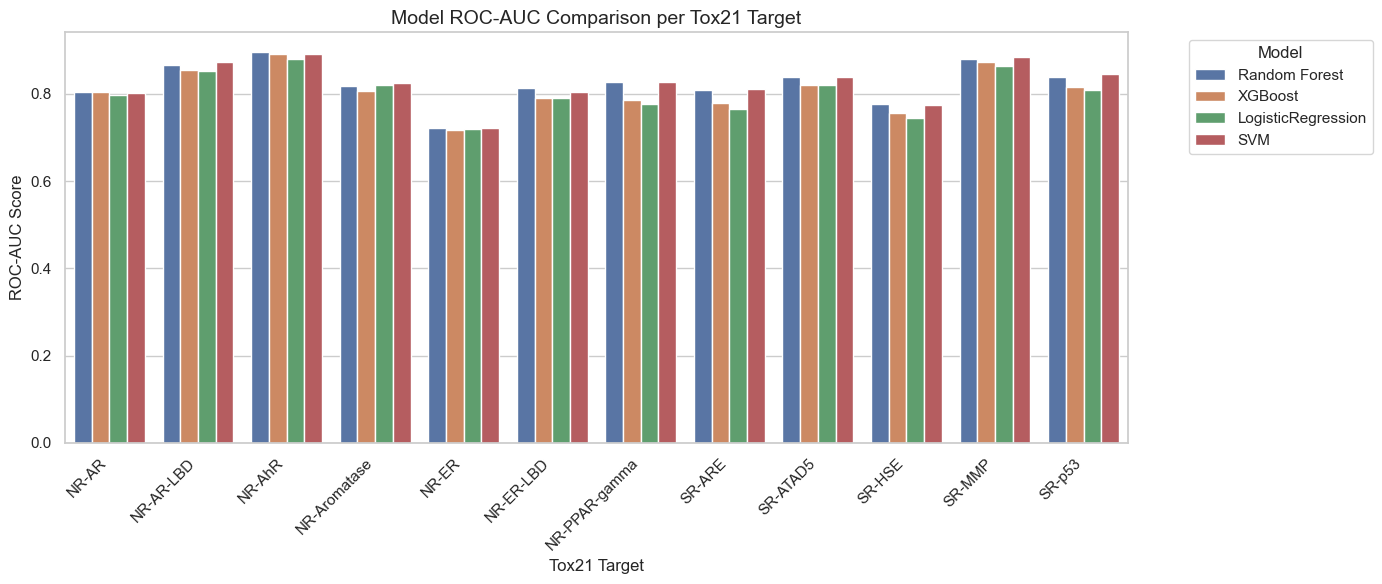

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and combine your data
df_rf_xgb = pd.read_csv("tox21_model_tuning_results.csv")
df_lr = pd.read_csv("logistic_regression_tuning_results.csv")
df_svm = pd.read_csv("svm_tuning_results.csv")

df_rf_xgb_clean = df_rf_xgb[['Target', 'Model', 'ROC_AUC']]
df_lr_clean = df_lr[['Target', 'Model', 'Best ROC-AUC']].rename(columns={'Best ROC-AUC': 'ROC_AUC'})
df_svm_clean = df_svm[['Target', 'Model', 'Best ROC-AUC']].rename(columns={'Best ROC-AUC': 'ROC_AUC'})

auc_combined_df = pd.concat([df_rf_xgb_clean, df_lr_clean, df_svm_clean], ignore_index=True)
auc_combined_df['ROC_AUC'] = auc_combined_df['ROC_AUC'].round(4)

# Create the plot
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=auc_combined_df, x="Target", y="ROC_AUC", hue="Model")

plt.title("Model ROC-AUC Comparison per Tox21 Target", fontsize=14)
plt.xlabel("Tox21 Target")
plt.ylabel("ROC-AUC Score")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot
plt.savefig("model_roc_auc_comparison.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

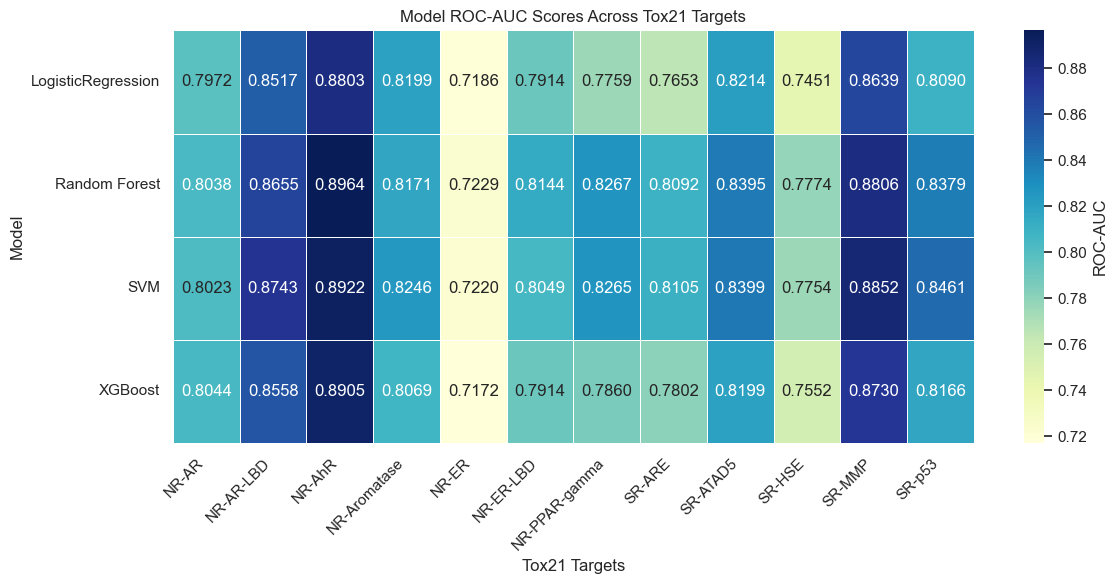

In [28]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load your CSV data
file_path = "pivoted_model_roc_auc_matrix.csv"  # Make sure this is in your working directory
df = pd.read_csv(file_path, index_col=0)

# Step 2: Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df, 
            annot=True, 
            cmap="YlGnBu", 
            fmt=".4f", 
            linewidths=.5, 
            cbar_kws={'label': 'ROC-AUC'})

# Step 3: Customize and save
plt.title("Model ROC-AUC Scores Across Tox21 Targets")
plt.ylabel("Model")
plt.xlabel("Tox21 Targets")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("model_roc_auc_comparison_heatmap.png", dpi=300)  # High-quality PNG for LaTeX or reports
plt.show()


In [29]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("pivoted_model_roc_auc_matrix.csv")

# Drop the 'Model' column to isolate numeric AUC values
scores_df = df.drop(columns=["Model"])

# Calculate macro average AUC (mean across all target columns for each model)
df["Macro Avg AUC"] = scores_df.mean(axis=1)

# Print results
print(df[["Model", "Macro Avg AUC"]])


                Model  Macro Avg AUC
0  LogisticRegression       0.803308
1       Random Forest       0.824283
2                 SVM       0.825325
3             XGBoost       0.808092


In [30]:
import pandas as pd

# Load the GNN performance CSV
df_gnn = pd.read_csv("GCN_and_MPNN_Performance.csv")

# Add target names (assuming you have them from another source or previous classical file)
target_list = [
    "NR-AR", "NR-AR-LBD", "NR-AhR", "NR-Aromatase", "NR-ER",
    "NR-ER-LBD", "NR-PPAR-gamma", "SR-ARE", "SR-ATAD5",
    "SR-HSE", "SR-MMP", "SR-p53"
]
df_gnn["Target"] = target_list

# Reshape (pivot) the data
df_gnn_melted = df_gnn.melt(id_vars="Target", var_name="Model", value_name="ROC_AUC")
df_gnn_pivoted = df_gnn_melted.pivot(index="Target", columns="Model", values="ROC_AUC")

# Display or save
print(df_gnn_pivoted)
df_gnn_pivoted.to_csv("pivoted_gnn_roc_auc.csv")


Model            MPNN  mt-GCN  st-GCN
Target                               
NR-AR          0.8002  0.7986  0.8118
NR-AR-LBD      0.8838  0.8692  0.8400
NR-AhR         0.8971  0.8937  0.8651
NR-Aromatase   0.8606  0.8584  0.7465
NR-ER          0.7280  0.7270  0.7108
NR-ER-LBD      0.8253  0.8366  0.7653
NR-PPAR-gamma  0.8643  0.8753  0.7618
SR-ARE         0.8298  0.8302  0.7503
SR-ATAD5       0.8584  0.8707  0.7692
SR-HSE         0.8198  0.8141  0.7621
SR-MMP         0.9043  0.9055  0.8469
SR-p53         0.8661  0.8729  0.7837


In [31]:
import pandas as pd

# === Step 1: Load both CSV files ===
# Replace with your file paths
df_classical = pd.read_csv("pivoted_model_roc_auc_matrix.csv")
df_gnn = pd.read_csv("GCN_and_MPNN_Performance.csv")

# === Step 2: Process classical models ===
df_classical.set_index("Model", inplace=True)
df_classical_transposed = df_classical.transpose()
df_classical_transposed.index.name = "Target"

# === Step 3: Process GNN models ===
# If your GNN file is still in wide format with models as columns and targets as rows:
target_list = df_classical_transposed.index.tolist()
df_gnn["Target"] = target_list
df_gnn_melted = df_gnn.melt(id_vars="Target", var_name="Model", value_name="ROC_AUC")
df_gnn_pivoted = df_gnn_melted.pivot(index="Target", columns="Model", values="ROC_AUC")

# === Step 4: Merge both dataframes ===
df_combined = pd.concat([df_classical_transposed, df_gnn_pivoted], axis=1)

# === Step 5: View or save the result ===
print(df_combined)

# Optionally save to CSV
df_combined.to_csv("combined_model_gnn_roc_auc.csv")


Model          LogisticRegression  Random Forest     SVM  XGBoost    MPNN  \
Target                                                                      
NR-AR                      0.7972         0.8038  0.8023   0.8044  0.8002   
NR-AR-LBD                  0.8517         0.8655  0.8743   0.8558  0.8838   
NR-AhR                     0.8803         0.8964  0.8922   0.8905  0.8971   
NR-Aromatase               0.8199         0.8171  0.8246   0.8069  0.8606   
NR-ER                      0.7186         0.7229  0.7220   0.7172  0.7280   
NR-ER-LBD                  0.7914         0.8144  0.8049   0.7914  0.8253   
NR-PPAR-gamma              0.7759         0.8267  0.8265   0.7860  0.8643   
SR-ARE                     0.7653         0.8092  0.8105   0.7802  0.8298   
SR-ATAD5                   0.8214         0.8395  0.8399   0.8199  0.8584   
SR-HSE                     0.7451         0.7774  0.7754   0.7552  0.8198   
SR-MMP                     0.8639         0.8806  0.8852   0.8730  0.9043   

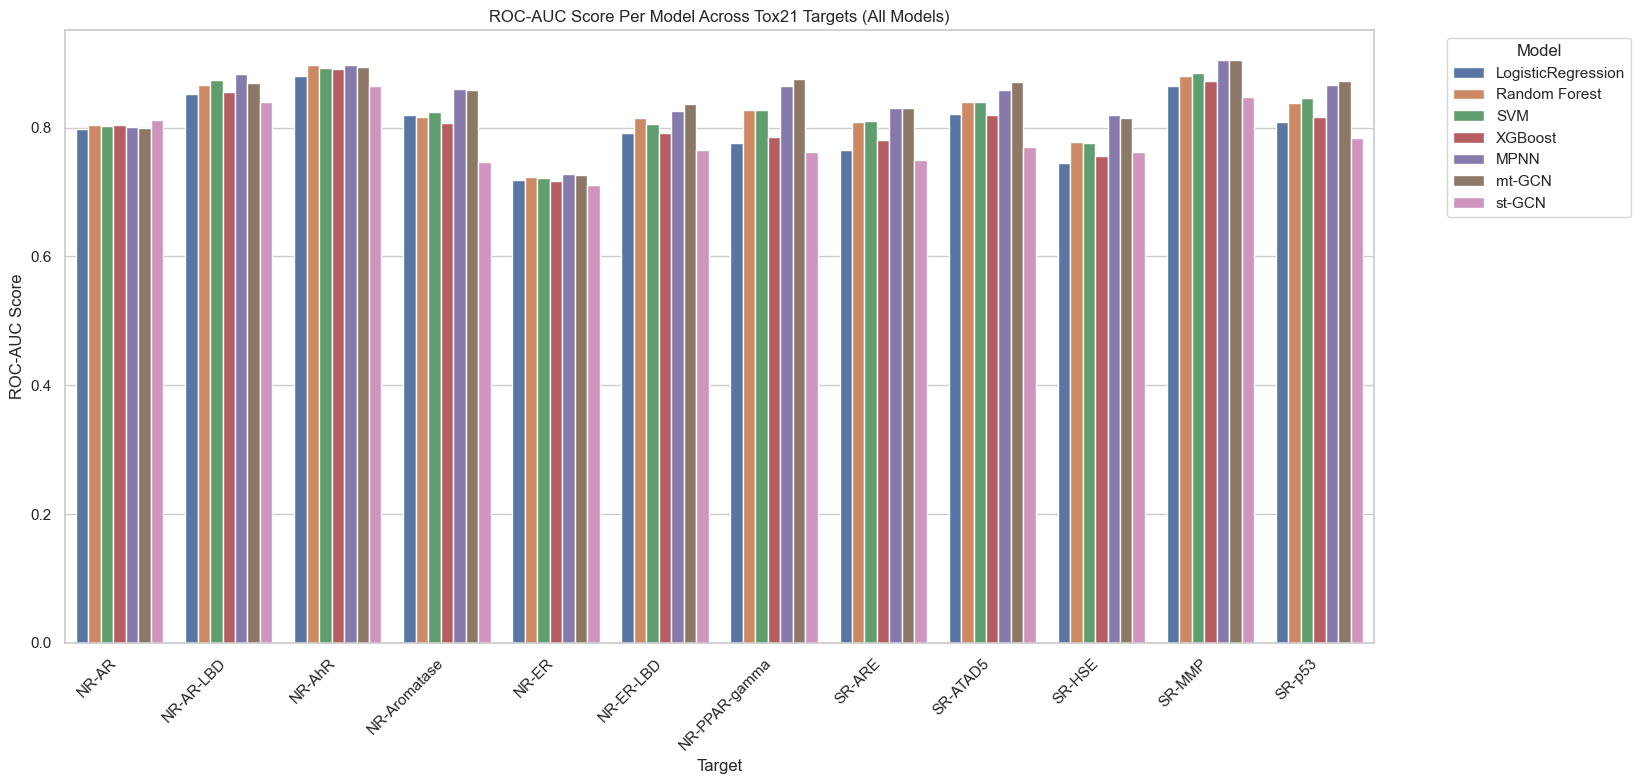

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the combined model ROC-AUC data
df = pd.read_csv("combined_model_gnn_roc_auc.csv")

# Step 2: Melt the dataframe to long format for seaborn plotting
df_melted = df.melt(id_vars="Target", var_name="Model", value_name="ROC_AUC")

# Step 3: Plotting
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create the grouped bar chart
sns.barplot(data=df_melted, x="Target", y="ROC_AUC", hue="Model")

# Customize the plot
plt.title("ROC-AUC Score Per Model Across Tox21 Targets (All Models)")
plt.ylabel("ROC-AUC Score")
plt.xlabel("Target")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("roc_auc_bar_chart_gnn_combined.png", dpi=300, bbox_inches="tight")

# Step 4: Display the plot
plt.show()


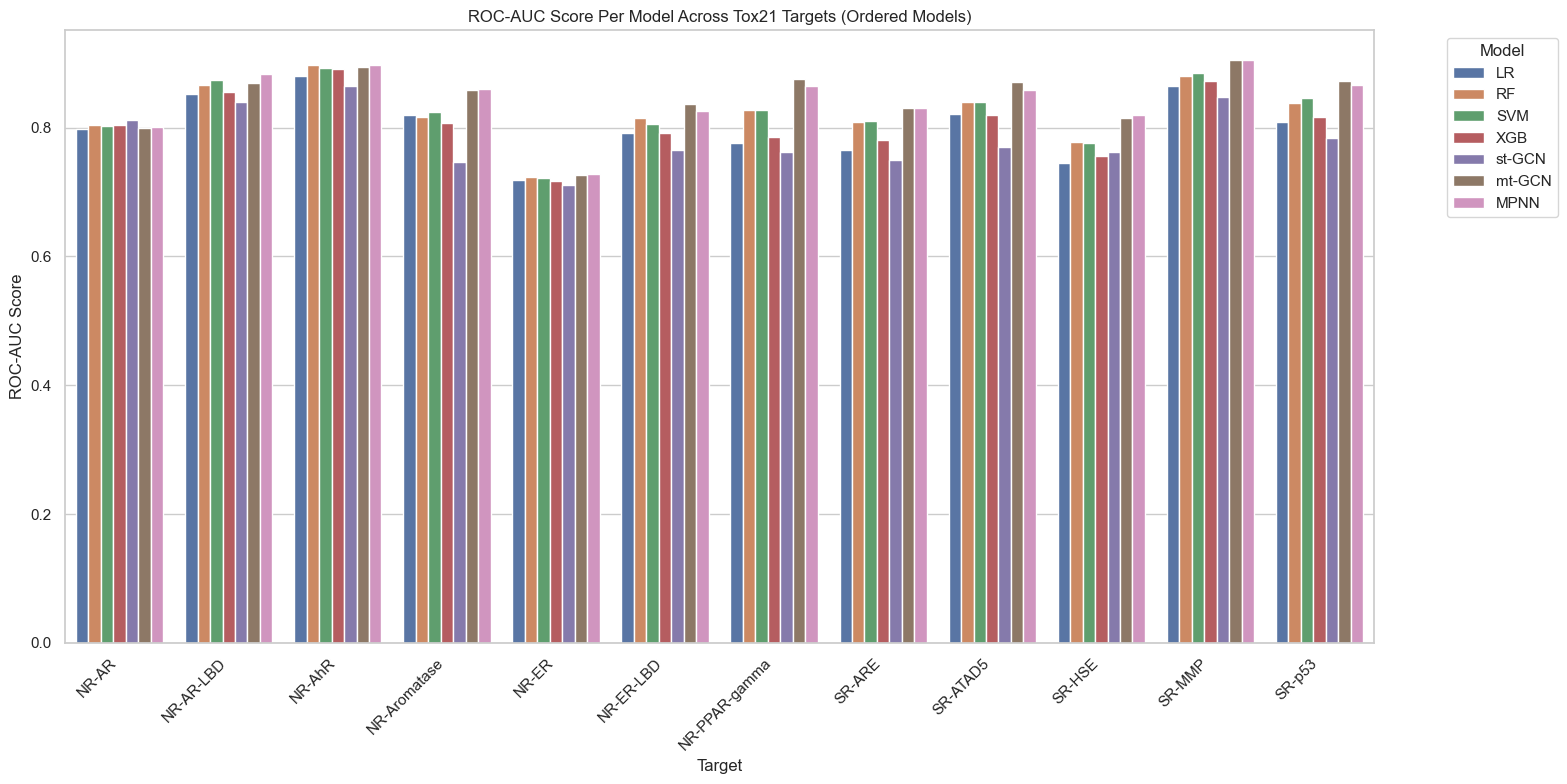

In [35]:
# Updated bar chart with GNN models

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV
df = pd.read_csv("combined_model_gnn_roc_auc.csv")

# Melt the data
df_melted = df.melt(id_vars="Target", var_name="Model", value_name="ROC_AUC")

# Define the custom model order (matching the table you shared)
model_order = [
    "LR", "RF", "SVM", "XGB",  # Classical
    "st-GCN", "mt-GCN", "MPNN"  # GNNs
]

# If your actual CSV uses full names, map them accordingly (optional)
name_mapping = {
    "LogisticRegression": "LR",
    "Random Forest": "RF",
    "SVM": "SVM",
    "XGBoost": "XGB",
    "st-GCN": "st-GCN",
    "mt-GCN": "mt-GCN",
    "MPNN": "MPNN"
}
df_melted["Model"] = df_melted["Model"].replace(name_mapping)

# Apply the custom categorical ordering
df_melted["Model"] = pd.Categorical(df_melted["Model"], categories=model_order, ordered=True)

# Plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
sns.barplot(data=df_melted, x="Target", y="ROC_AUC", hue="Model")

# Customize
plt.title("ROC-AUC Score Per Model Across Tox21 Targets (Ordered Models)")
plt.ylabel("ROC-AUC Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("roc_auc_bar_chart_gnn_combined.png", dpi=300, bbox_inches="tight")

plt.show()


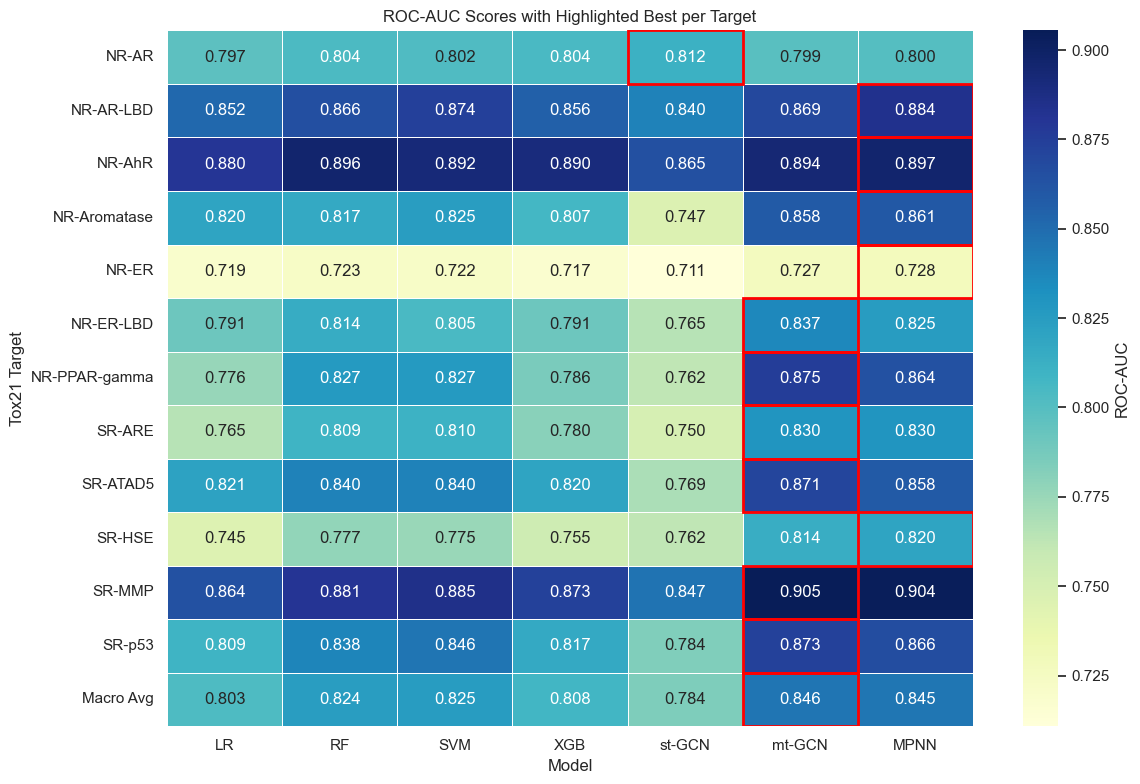

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv("combined_model_gnn_roc_auc.csv")
df = df.rename(columns={
    "LogisticRegression": "LR",
    "Random Forest": "RF",
    "SVM": "SVM",
    "XGBoost": "XGB"
})
df.set_index("Target", inplace=True)
model_order = ["LR", "RF", "SVM", "XGB", "st-GCN", "mt-GCN", "MPNN"]
df = df[model_order]
df.loc["Macro Avg"] = df.mean()

# Highlight mask
highlight_mask = df.eq(df.max(axis=1), axis=0)

# Plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

ax = sns.heatmap(
    df.astype(float),
    annot=True,
    cmap="YlGnBu",
    fmt=".3f",
    linewidths=0.5,
    cbar_kws={'label': 'ROC-AUC'},
    xticklabels=True,
    yticklabels=True
)

# Add red rectangles to highlight best scores
for y in range(df.shape[0]):
    for x in range(df.shape[1]):
        if highlight_mask.iloc[y, x]:
            ax.add_patch(plt.Rectangle((x, y), 1, 1, fill=False, edgecolor='red', lw=2))

# Titles and labels
plt.title("ROC-AUC Scores with Highlighted Best per Target")
plt.xlabel("Model")
plt.ylabel("Tox21 Target")

# ✅ Save the figure as PNG
plt.savefig("roc_auc_heatmap_bold_best_score.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.tight_layout()
plt.show()
